In [73]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance
from scipy.stats import norm
from scipy import stats
from scipy.stats import wasserstein_distance

In [74]:
df = pd.read_csv('preci_alt.csv')
df = pd.read_csv('preci_alt.csv')
df.columns = ['date','value']
df.date = pd.to_datetime(df.date,format='%b %d, %Y')
df.head(3)

,date,value
0,2010-01-01,0.0
1,2010-01-02,0.0
2,2010-01-03,0.0


In [75]:
q1 = df[(df.date.dt.month == 6)  ]
q2 = df[(df.date.dt.month == 7) ]

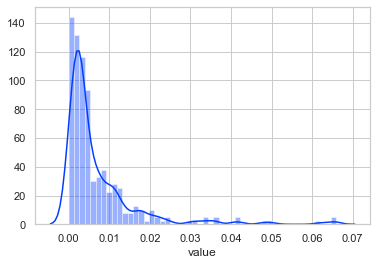

In [76]:
sns.distplot(q1.value,bins=50)

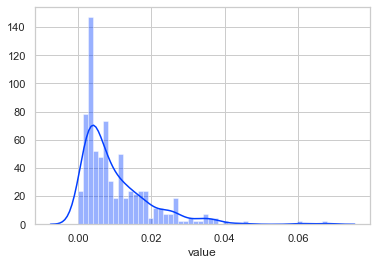

In [77]:
sns.distplot(q2.value,bins=50)

In [78]:
print(wasserstein_distance(q1.value,q2.value))

0.0037163440860215062


In [79]:
q1 = (q1.value)
q2 = (q2.value)

In [80]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm

array([ 3.69869197e-03,  2.50442063e-04,  4.92203781e-03,  3.27334960e-03,
        6.22271961e-04,  4.40708002e-03,  2.79381110e-03,  2.40830236e-03,
        3.16227452e-04,  2.04128405e-03,  5.87968055e-03,  1.03960698e-03,
       -4.87093513e-04,  3.46365625e-03,  6.69160352e-04,  4.24361506e-03,
        5.63811561e-03,  2.65957042e-03,  1.35485676e-03,  4.74972256e-03,
        1.00583832e-03,  4.61662639e-04,  4.24210695e-03,  3.75255282e-03,
        2.48311398e-03,  2.85913401e-03,  7.71346849e-04,  1.22627237e-03,
        3.72386678e-03,  5.87974472e-03,  1.36523815e-03,  2.13144740e-03,
        2.74880168e-03,  4.35632501e-03,  9.46759368e-05,  1.93497851e-04,
        7.84794189e-03,  3.53186065e-03, -3.01884042e-03, -1.29667574e-04,
        3.18676967e-03, -1.43424369e-03,  1.60401776e-03,  1.77850112e-04,
        8.65962169e-04,  4.83105177e-03,  3.21288170e-03,  4.54512361e-03,
        1.19590079e-03,  4.19604730e-04,  4.72346599e-03, -1.57923900e-03,
        1.65498723e-03,  

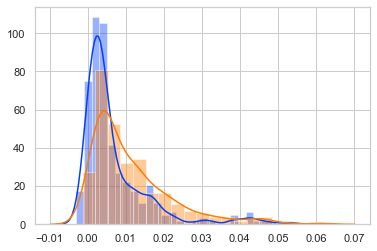

In [93]:
q1r,_ = best_gmmq1.sample(310)
q2r,_ = best_gmmq2.sample(310)
sns.distplot(q1r)
sns.distplot(q2r)
q1r = q1r[:,0]
q2r = q2r[:,0]
q1r

In [94]:
print(wasserstein_distance(q1r,q2r))

0.004357583547291896
